# 2019년 사망 교통사고 분석

*   어느 지역이 가장 많은 사망 교통사고사 발생 했었나
*   어느 시간대에 가장 많은 사망 교통사고가 발생 했었나
*   교통사고 정보를 지도에 표시하여 시각화



## 패키지 설치 및 라이브러리 import

In [1]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.4 MB/s eta 0:00:00


In [2]:
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import folium

## 데이터 준비하기


*   데이터 다운로드 : https://www.data.go.kr/data/15070340/fileData.do
*   도로교통공단_교통사고 정보_2019.csv


In [3]:
df = pd.read_csv('/content/도로교통공단_교통사고 정보_2019.csv')
# df = pd.read_csv('/content/도로교통공단_교통사고 정보_2019.csv', encoding = 'EUC-KR') 인코딩 하는 방법
df

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019123105,야,화,1,0,0,0,0,서울,...,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019123108,주,화,1,1,0,1,0,강원,...,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019123112,주,화,1,1,0,0,1,경북,...,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019123112,주,화,1,1,0,1,0,울산,...,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


In [4]:
df.info()
# 위도, 경도 데이터 존재 -> 지도로 시각화 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   int64  
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

## 사망교통사고 데이터 전처리

### 발생년월일시에서 컬럼에서 시간 컬럼 파생 변수 만들기

In [5]:
# 사망 교통사고가 가장 많이 발생하는 시간은 ?
# 발생년월일시 -> 뒤에 두자리(시간: 00 ~ 23) -> 파생 변수로 따로 분리
# 2019010100 -> 00 -> 분리할 수 있는 키워드가 없음 -> 문자열 슬라이싱

# 1) 발생년월일시 컬럼은 연속적인 숫자 (int) -> 문자열 슬라이싱 할 수 있는 string으로 형변환
df = df.astype({'발생년월일시' : 'string'})

In [6]:
df.info() # 발생년월일시가 string으로 형변환 되었다는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   string 
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

In [7]:
# 2) 시간으로 분리한 데이터를 발생시간 컬럼으로 담기

df['발생시간'] = df['발생년월일시'].str[8:]
df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생시간
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884,00
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292,03
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108,16
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946,19
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506,21


In [8]:
# 3) 발생시간 컬럼을 숫자 데이터 타입으로 변경
df = df.astype({'발생시간':'int'})
df.info() # 발생시간 int로 형변환 되었다는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   string 
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

### 발생년월일시 칼럼에서 발생년월일 칼럼 파생 변수 만들기

In [9]:
# 발생년월일시(string) -> 발생년월일(날짜 타입)으로 변경
# 2019010119 -> 20190101(년월일) 슬라이싱 -> YYYY-MM-DD(날짜 형태로 변경) -> 2019-01-01

df['발생년월일'] = pd.to_datetime(df['발생년월일시'].str[:8], format='%Y-%m-%d', errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   발생년         3233 non-null   int64         
 1   발생년월일시      3233 non-null   string        
 2   주야          3233 non-null   object        
 3   요일          3233 non-null   object        
 4   사망자수        3233 non-null   int64         
 5   부상자수        3233 non-null   int64         
 6   중상자수        3233 non-null   int64         
 7   경상자수        3233 non-null   int64         
 8   부상신고자수      3233 non-null   int64         
 9   발생지시도       3233 non-null   object        
 10  발생지시군구      3233 non-null   object        
 11  사고유형_대분류    3233 non-null   object        
 12  사고유형_중분류    3233 non-null   object        
 13  사고유형        3233 non-null   object        
 14  가해자법규위반     3233 non-null   object        
 15  도로형태_대분류    3233 non-null   object        
 16  도로형태        3233 non-nul

In [10]:
df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생시간,발생년월일
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884,0,2019-01-01
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292,3,2019-01-01
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108,16,2019-01-01
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946,19,2019-01-01
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506,21,2019-01-01


### 필요없는 칼럼 삭제 및 컬럼 정렬

In [11]:
# 1) 필요없는 칼럼 삭제
del df['발생년월일시']
df.head()

,발생년,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생시간,발생년월일
0,2019,야,화,1,0,0,0,0,부산,해운대구,...,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884,0,2019-01-01
1,2019,야,화,1,0,0,0,0,경기,안산시,...,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292,3,2019-01-01
2,2019,주,화,1,0,0,0,0,경북,청도군,...,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108,16,2019-01-01
3,2019,야,화,1,0,0,0,0,대전,서구,...,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946,19,2019-01-01
4,2019,야,화,1,0,0,0,0,경북,영천시,...,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506,21,2019-01-01


In [12]:
# 2) 칼럼 순서 정리 (발생년, 발생년월일, 발생시간 ~~~)

df.columns[-2:] # 리스트 형태가 아님

# 2-1) 칼럼명을 리스트로 만들자

col1 = df.columns[-2:].to_list()
col1.reverse()
col2 = df.columns[1:-2].to_list()

col_list = col1 + col2
col_list.insert(0, '발생년')

# 2-2) 원하는 칼럼 순서로 추출 후 다시 담기
df = df[col_list]


In [13]:
df.columns # 확인 해주기

Index(['발생년', '발생년월일', '발생시간', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

### 정제된 데이터셋 저장하기

In [14]:
df.to_csv('2019년 지역별 교통사고 데이터 전처리.csv', encoding='utf-8-sig', index = False)

## 데이터 시각화

### 날짜별/시간별 교통사고 현황보기

In [15]:
fig = px.scatter(df, x = '발생년월일', y = '발생시간', color = '발생지시도', hover_data=['발생시간'])
fig.show()

### 시간대별 교통사고 사망자 현황

In [16]:
fig = px.bar(df, x = '사망자수', y = '발생시간', orientation='h') # 'h' 로 작성 -> 가로로 그림
fig.show()

In [17]:
fig = px.bar(df, x = '발생시간', y = '사망자수') # 세로로 그림
fig.show()

### 시도별 교통사고 사망자 현황

In [18]:
location_list = df['발생지시도'].unique() # 열(column)에서 고유한 값을 추출하는 데 사용
location_list.sort() # 가나다 순으로

In [19]:
location_list

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [20]:
fig = px.bar(df, x = '사망자수', y = '발생지시도', orientation='h') # 'h' 로 작성 -> 가로로 그림
fig.show()

In [21]:
fig = px.bar(df, x = '사망자수', y = '발생지시도', orientation='h', category_orders = {'발생지시도': location_list}) # 'h' 로 작성 -> 가로로 그림
fig.show()

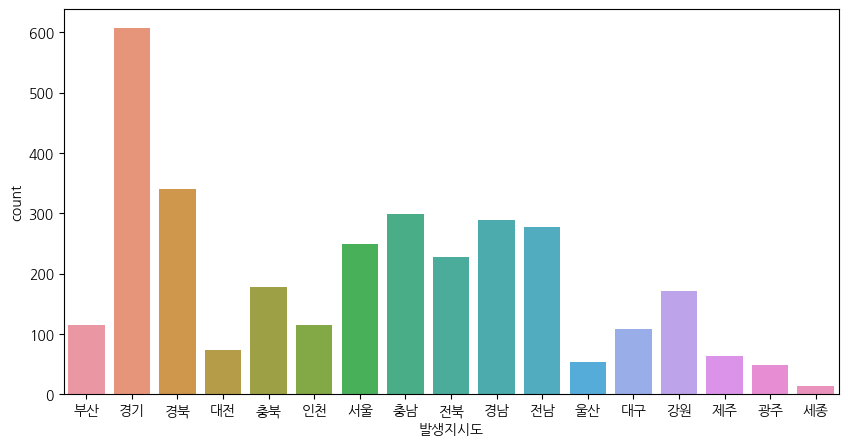

In [22]:
plt.figure(figsize=(10,5)) # 사이즈 조
sns.countplot(data = df, x = '발생지시도')
plt.show()

### 요일별 교통사고 현황

In [23]:
fig = px.bar(df, x = '사망자수', y = '요일', orientation='h') # 'h' 로 작성 -> 가로로 그림
fig.show()
# 사망자 기준

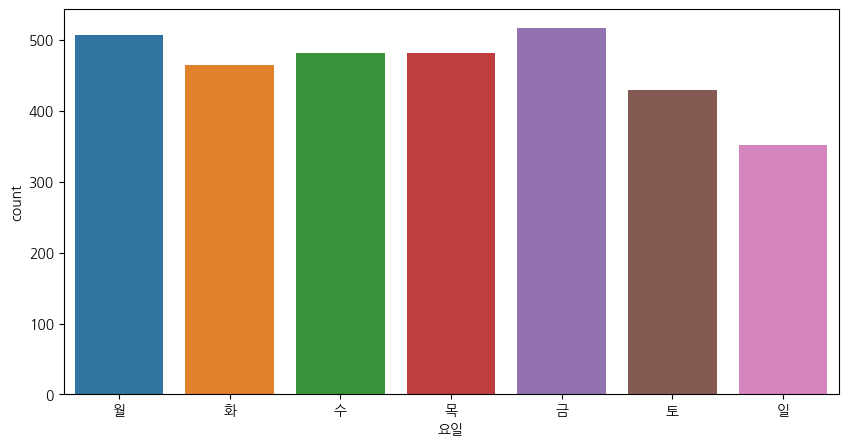

In [24]:
plt.figure(figsize=(10,5)) # 사이즈 조절
sns.countplot(data = df, x = '요일', order = ['월', '화', '수', '목', '금', '토', '일']) # order 를 주어 순서를 조정한다.
plt.show()
# count 수

### 사고 유형별 교통사고 현황

In [25]:
fig = px.bar(df, x = '사망자수', y = '사고유형', orientation='h') # 'h' 로 작성 -> 가로로 그림
fig.show()

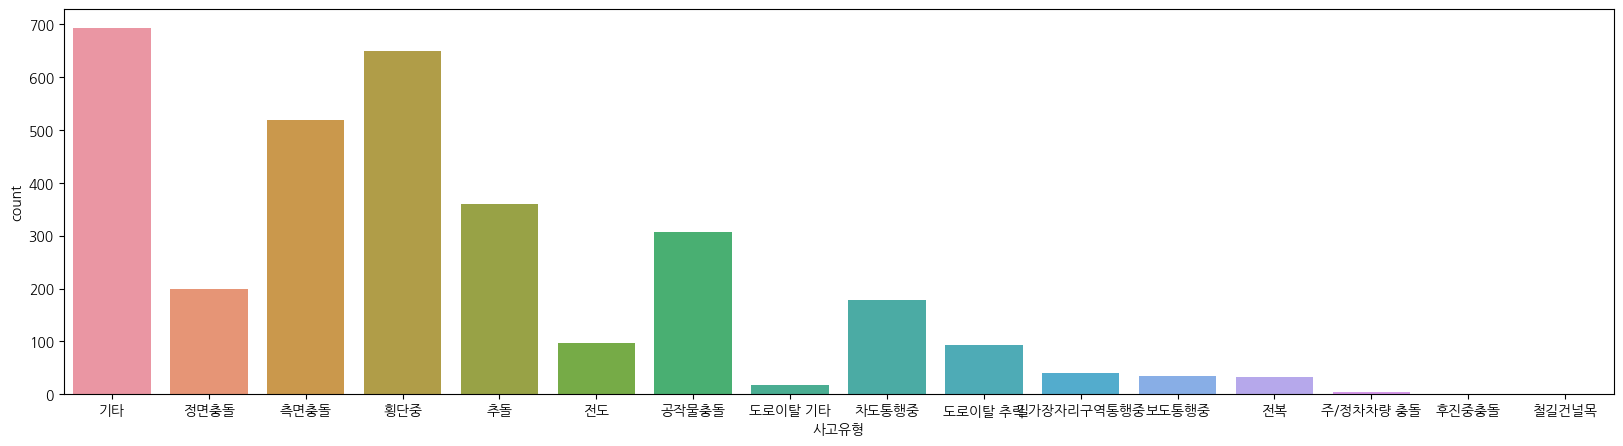

In [26]:
plt.figure(figsize=(20,5)) # 사이즈 조절
sns.countplot(data = df, x = '사고유형')
plt.show()

### 가해자 법규 위반

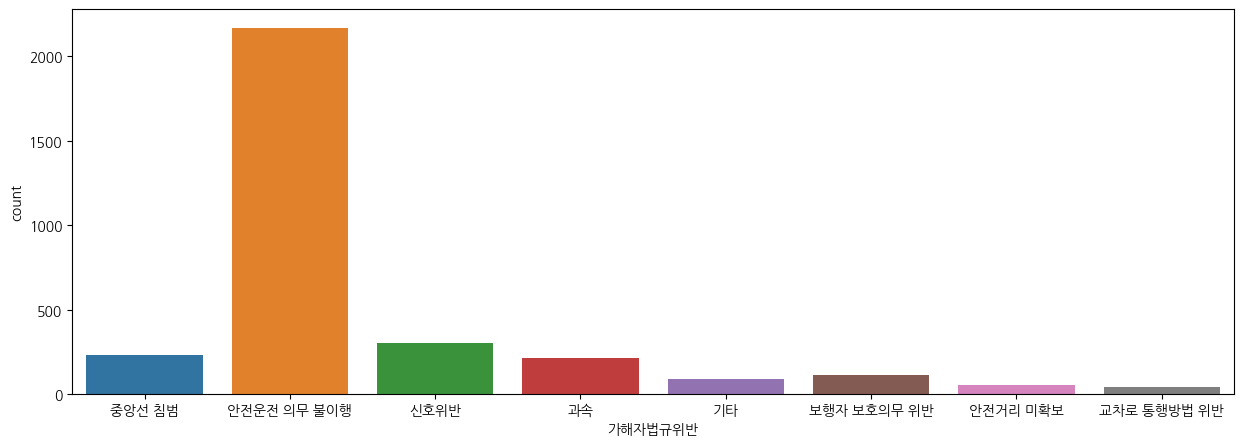

In [27]:
plt.figure(figsize=(15,5)) # 사이즈 조절
sns.countplot(data = df, x = '가해자법규위반')
plt.show()

## 대전광역시 교통사고 발생 데이터 분석

### 데이터 준비하기

In [39]:
dj_df = df[df['발생지시도'] == '대전']
dj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 3 to 3124
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   발생년         74 non-null     int64         
 1   발생년월일       74 non-null     datetime64[ns]
 2   발생시간        74 non-null     int64         
 3   주야          74 non-null     object        
 4   요일          74 non-null     object        
 5   사망자수        74 non-null     int64         
 6   부상자수        74 non-null     int64         
 7   중상자수        74 non-null     int64         
 8   경상자수        74 non-null     int64         
 9   부상신고자수      74 non-null     int64         
 10  발생지시도       74 non-null     object        
 11  발생지시군구      74 non-null     object        
 12  사고유형_대분류    74 non-null     object        
 13  사고유형_중분류    74 non-null     object        
 14  사고유형        74 non-null     object        
 15  가해자법규위반     74 non-null     object        
 16  도로형태_대분류    74 non-null   

### 발생시간별 교통사고 사망자 현황

In [29]:
# 전국 19시 가장 많은 사망교통사고 -> 대전은 20시에 가장 많이 발생
fig = px.bar(dj_df, x = '사망자수', y = '발생시간', orientation = 'h')
fig.show()

### 지역구별 교통사고 사망자 현황

In [30]:
fig = px.bar(dj_df, x = '사망자수', y = '발생지시군구', orientation = 'h')
fig.show()

### 요일별 교통사고 사망자 현황

In [31]:
# 전국은 월요일, 금요일 사망 교통사고 발생 -> 대전은 목요일에 가장 많이 발생
fig = px.bar(dj_df, x = '사망자수', y = '요일', orientation = 'h')
fig.show()

In [32]:
fig = px.bar(dj_df, x='사망자수',y='요일',orientation='h', category_orders={'요일':['월','화','수','목','금','토','일']})
fig.show()

### 사고 유형별 교통사고 사망자 현황

In [33]:
# 전국은 보행중 사망 교통사고 발생 -> 대전도 보행중 가장 많이 발생
fig = px.bar(dj_df, x = '사망자수', y = '사고유형', orientation = 'h')
fig.show()

## 지도를 활용하여 교통사고 현황 분석

### 기본 지도 준비하기

In [34]:
import folium

map = folium.Map(location=[36.3504119,127.3845475]) # 경도, 위도
map

### 대전광역시 사망교통사고 위치 지도 시각화

#### 사망자수에 따른 마커 크기로 시각화

In [35]:
# 사망사고 위치에 CircleMarker 표출
# CircleMarker 사이즈 = 사망자수 + 부상자수 (중상자수 + 경상자수 + 부상신고자수)
# CircleMarker 클릭하면, popup으로 사고유형 나타나도록 구현

# CircleMarker 사이즈 (radius) -> 실수형 데이터만 취급
# 사망자수, 부상자수 칼럼 데이터 타입 -> 실수형으로 변경

dj_df = dj_df.astype({'사망자수' : float, '부상자수' : float})
dj_df.head()

,발생년,발생년월일,발생시간,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
3,2019,2019-01-01,19,야,화,1.0,0.0,0,0,0,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
43,2019,2019-01-07,18,야,월,1.0,0.0,0,0,0,...,횡단중,안전운전 의무 불이행,교차로,교차로내,승합차,보행자,991972.0,1812502.0,127.410575,36.309824
105,2019,2019-01-14,7,주,월,1.0,0.0,0,0,0,...,기타,신호위반,교차로,교차로부근,화물차,자전거,990556.0,1826775.0,127.394629,36.438487
114,2019,2019-01-15,4,야,화,1.0,0.0,0,0,0,...,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,994663.0,1814573.0,127.440536,36.328513
208,2019,2019-01-24,21,야,목,1.0,0.0,0,0,0,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,992948.0,1819982.0,127.421379,36.377267


#### 사망자수 + 부상자수에 따른 CircleMarker 지도에 표출

In [36]:
# 1) 지도 준비

map = folium.Map(location=[36.3504119,127.3845475]) # 경도, 위도

# 2) CircleMarker 지도에 표출 -> for문 이용해서 dj_df 데이터가 있을때까지 CircleMarker 지도에 add

for n in  dj_df.index :
  # CircleMarker size
  cnt = dj_df['사망자수'][n] + dj_df['부상자수'][n]

  # 위도, 경도 추출
  lat = dj_df['위도'][n]
  lng = dj_df['경도'][n]

  # CircleMarker 지도에 add
  folium.CircleMarker([lat, lng], radius= cnt * 10, popup= dj_df['사고유형'][n],
                      color = '#F70000', fill_color = 'F70000').add_to(map)

map

#### 대전광역시 사망교통사고 지도 시각화 저장하기

In [37]:
map.save('2019_대전교통사고현황.html')